In [4]:
# IMPORTING PACKAGES
# ------------------------------------------------------
import pandas as pd
import numpy as np
import os
import re
import warnings

# VISUALIZATION
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 0
pd.options.display.max_colwidth =10

# CONFIGURATIONS
# ------------------------------------------------------
warnings.filterwarnings("ignore")

In [5]:
os.chdir("data")

In [6]:
df = pd.read_csv("CleanedData.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41869 entries, 0 to 41868
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              41869 non-null  object 
 1   Name            41869 non-null  object 
 2   Brand           41869 non-null  object 
 3   Description     41869 non-null  object 
 4   Category_name   41869 non-null  object 
 5   Merchant        41869 non-null  object 
 6   Actual_price    41869 non-null  float64
 7   Discount_price  41869 non-null  float64
 8   isSale          41869 non-null  object 
 9   Discount_per    41869 non-null  float64
 10  Imp_count       41869 non-null  int64  
 11  Day             41869 non-null  int64  
 12  Month           41869 non-null  int64  
 13  Year            41869 non-null  int64  
 14  Week            41869 non-null  int64  
 15  Month_Name      41869 non-null  object 
 16  Day_Name        41869 non-null  object 
 17  Date            41869 non-null 

In [5]:
df.describe()

,Actual_price,Discount_price,Discount_per,Imp_count,Day,Month,Year,Week
count,41869....,41869....,41869....,41869....,41869....,41869....,41869....,41869....
mean,535.48...,519.08...,1.747614,11.115742,15.766223,6.946237,2017.1...,28.305214
std,1134.8...,1107.4...,7.705244,21.487370,9.581026,2.926866,0.486051,12.759721
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2014.0...,1.000000
25%,84.950000,82.990000,0.000000,2.000000,7.000000,5.000000,2017.0...,19.000000
50%,199.00...,198.00...,0.000000,6.000000,17.000000,7.000000,2017.0...,30.000000
75%,499.99...,499.95...,0.000000,12.000000,25.000000,9.000000,2017.0...,37.000000
max,26871....,26871....,85.870000,198.00...,31.000000,12.000000,2018.0...,53.000000


In [6]:
#All Numerical Columns
numerics = ['Actual_price', 'Discount_price', 'Discount_per',"Imp_count","Week","Month","Year"]

In [7]:
df.corr()

,Actual_price,Discount_price,Discount_per,Imp_count,Day,Month,Year,Week
Actual_price,1.000000,0.992367,0.080506,-0.014218,0.019281,-0.019903,0.067744,-0.017774
Discount_price,0.992367,1.000000,0.011356,-0.010673,0.017982,-0.023010,0.064426,-0.020998
Discount_per,0.080506,0.011356,1.000000,-0.006855,0.030758,0.052898,0.042482,0.055333
Imp_count,-0.014218,-0.010673,-0.006855,1.000000,0.023416,-0.033238,0.051322,-0.031175
Day,0.019281,0.017982,0.030758,0.023416,1.000000,-0.053343,-0.002466,0.052853
Month,-0.019903,-0.023010,0.052898,-0.033238,-0.053343,1.000000,-0.433433,0.993907
Year,0.067744,0.064426,0.042482,0.051322,-0.002466,-0.433433,1.000000,-0.433692
Week,-0.017774,-0.020998,0.055333,-0.031175,0.052853,0.993907,-0.433692,1.000000


<AxesSubplot:>

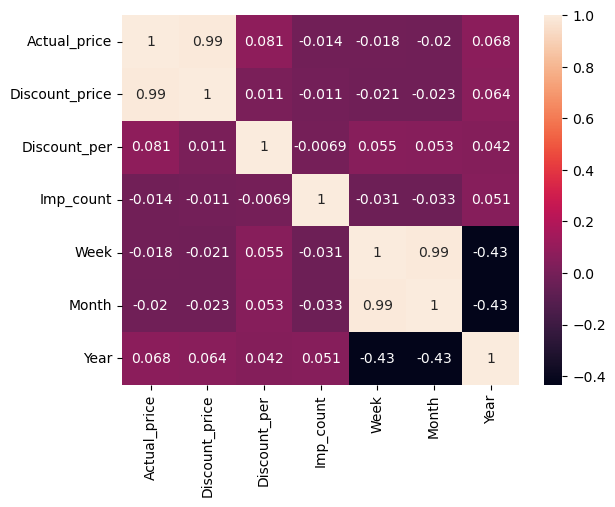

In [8]:
sns.heatmap(df[numerics].corr(), annot=True)

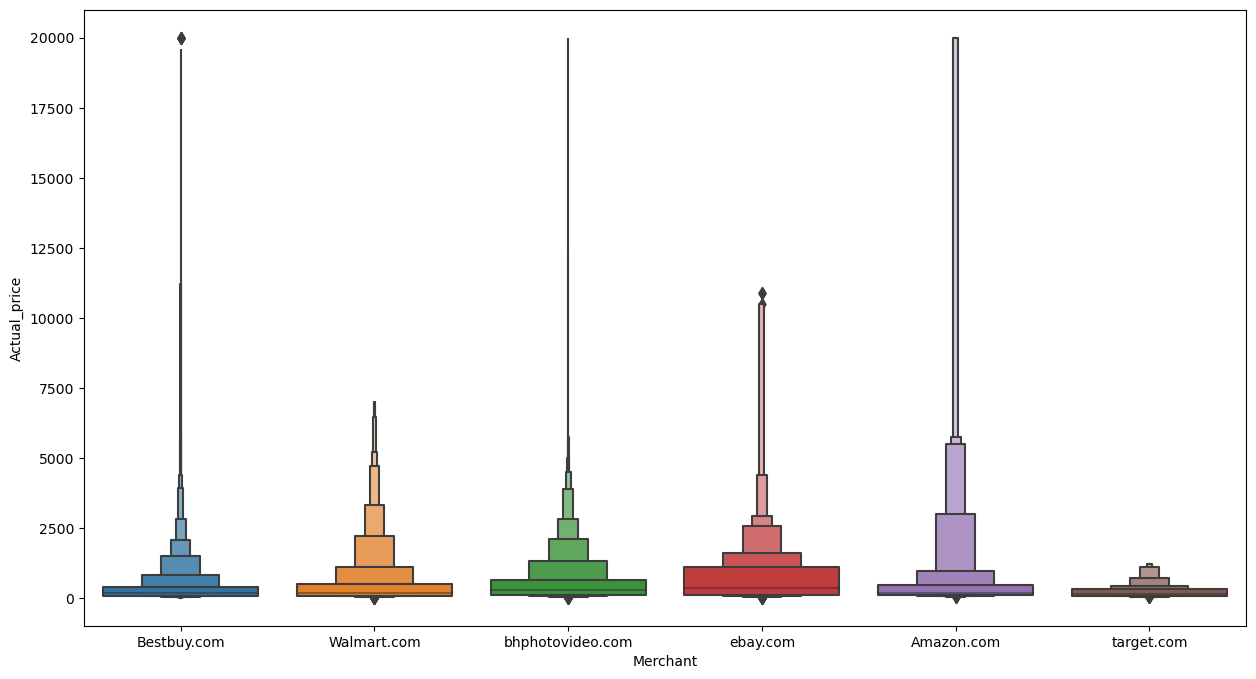

In [9]:
Selected_merchant = df.loc[df.Merchant.isin(df['Merchant'].value_counts()[0:6].index)]
plt.figure(figsize=(15,8))
ax = sns.boxenplot(x=Selected_merchant['Merchant'],y=Selected_merchant['Actual_price'])

Bestbuy, Amazon sells more expensive products, while Target sells products at a lower price point based on their price.

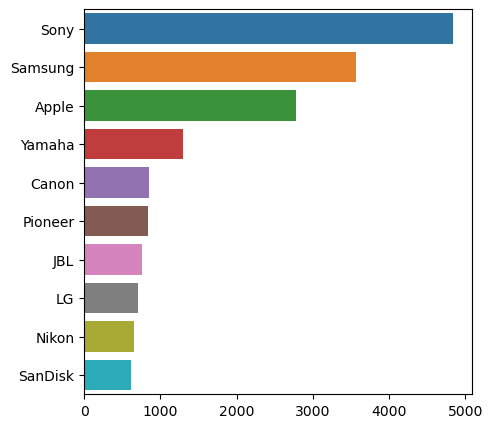

In [10]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x = df['Brand'].value_counts().values[0:10],y = df['Brand'].value_counts().index[0:10])
# Brand Distribution

The largest share of the market is held by Sony and Samsung, with Apple and other companies following behind.

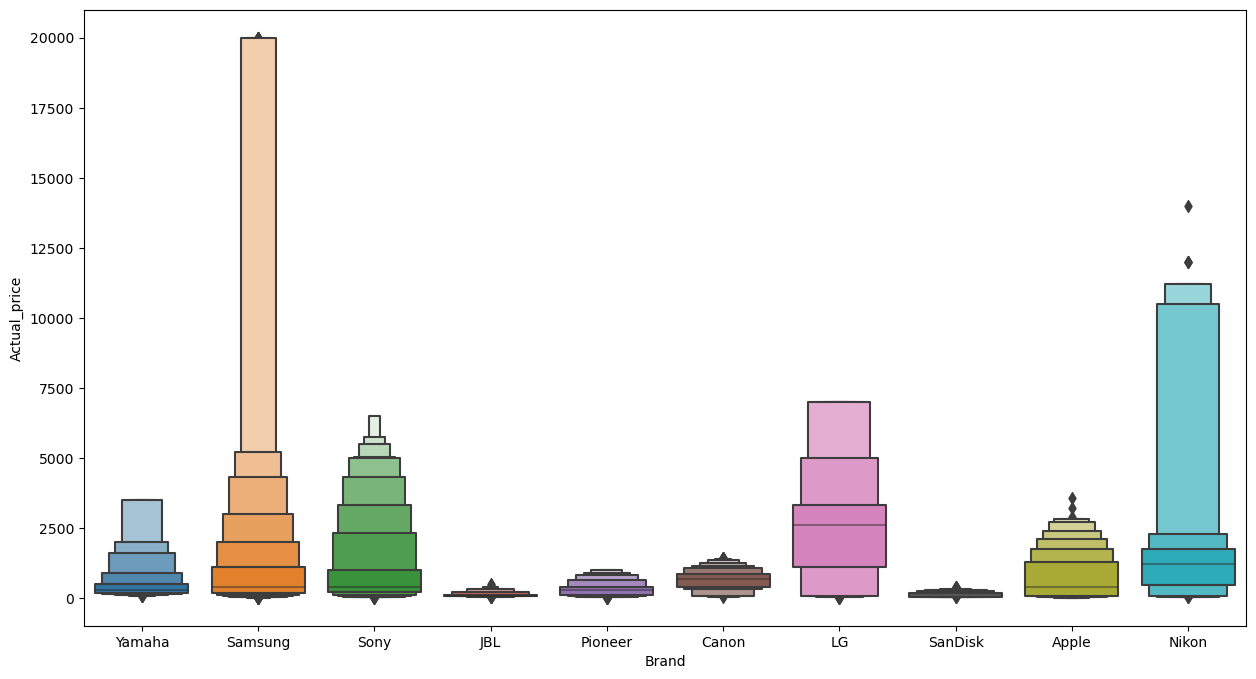

In [11]:
Selected_brand = df.loc[df.Brand.isin(df['Brand'].value_counts()[0:10].index)]
Selected_brand

plt.figure(figsize=(15,8))
ax = sns.boxenplot(x=Selected_brand['Brand'],y=Selected_brand['Actual_price'],scale="linear")

1. LG produces mainly expensive, high-end products, while Samsung and Nikon make both simple and high-end products.
2. Apple and Sony have a specific limit on the prices of their products.

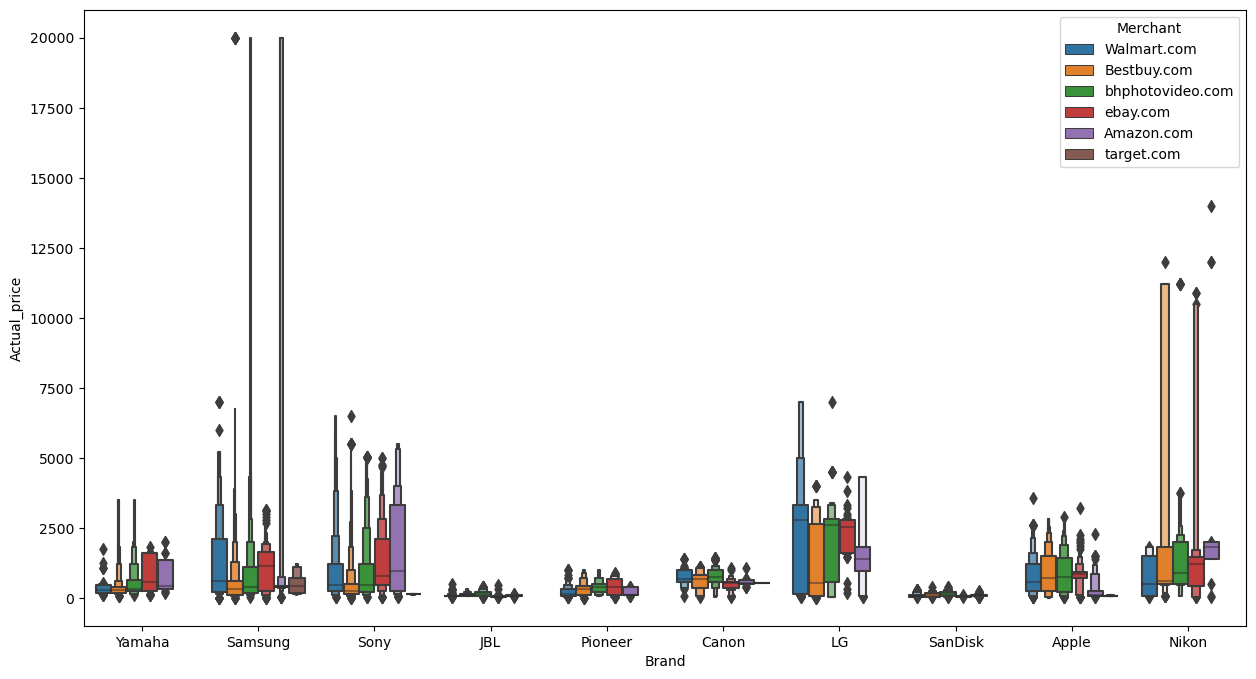

In [12]:
Selected_brand_merchant = Selected_brand[Selected_brand.Merchant.isin(Selected_merchant.Merchant.unique())]
# Selected_brand_merchant

plt.figure(figsize=(15,8))
ax = sns.boxenplot(x=Selected_brand_merchant['Brand'],y=Selected_brand_merchant['Actual_price'],hue=Selected_brand_merchant['Merchant'])

1. Samsung, Sony, and Apple products are widely available and sold by many different vendors.
2. LG prodcusts are mainly sold by Walmart and Amazon.
3. Nikon on the other hand is mainly sold on Bestbuy and Ebay.

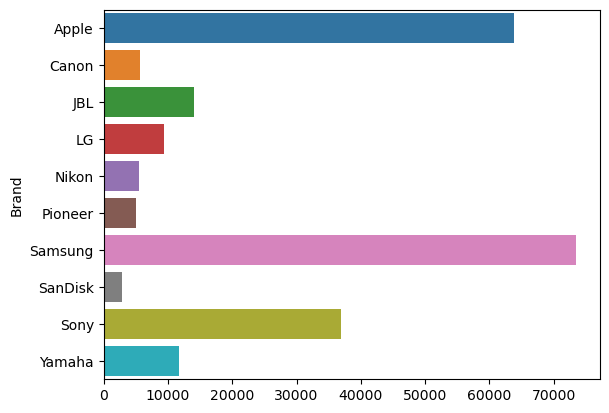

In [13]:
ax =sns.barplot(y=Selected_brand.groupby('Brand').sum()['Imp_count'].index,x=Selected_brand.groupby('Brand').sum()['Imp_count'].values)

Sony, Samsung, and Apple are among the most popular and best-selling products in the market.

<AxesSubplot:title={'center':'Year wise distribution'}, xlabel='Year', ylabel='Imp_count'>

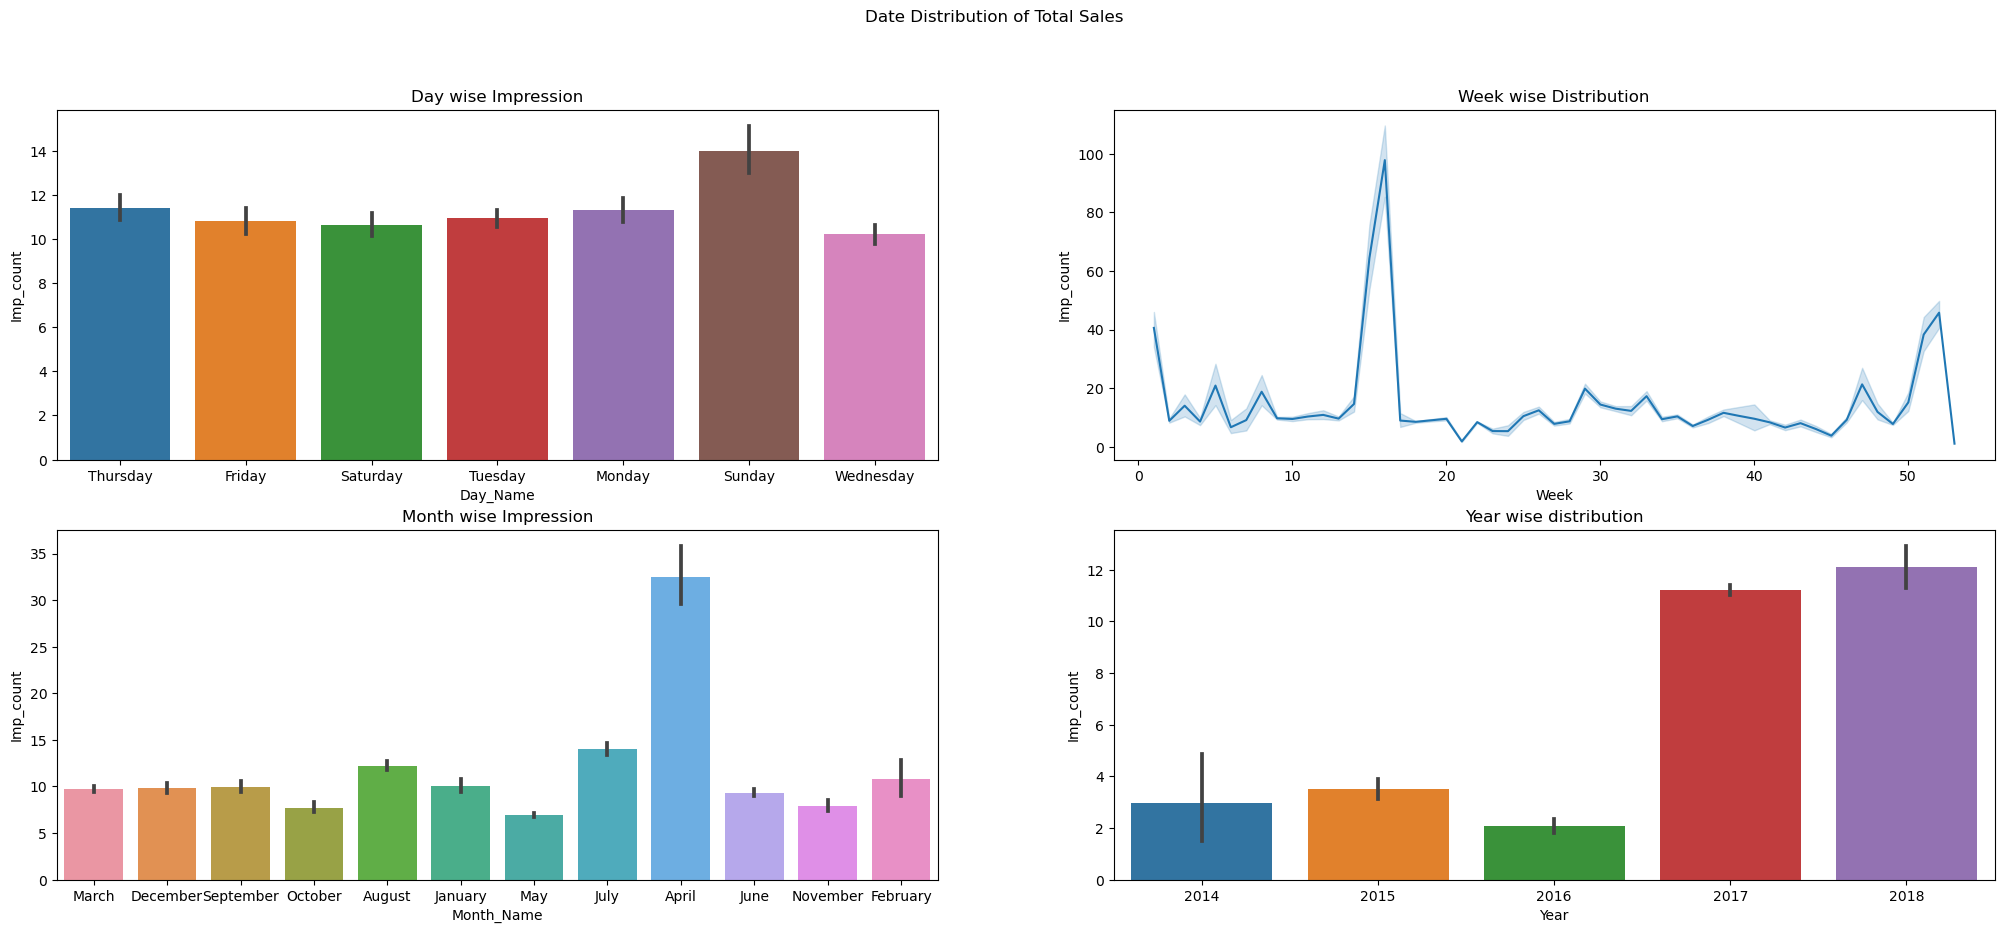

In [14]:
# Day Month Year Week Month_Name Day_Name Formatted_date Disc_Per Total_sale


fig, axes = plt.subplots(2, 2, figsize=(25, 10))
fig.suptitle('Date Distribution of Total Sales')
axes[0,0].set_title('Day wise Impression')
axes[0,1].set_title('Week wise Distribution')
axes[1,0].set_title('Month wise Impression')
axes[1,1].set_title('Year wise distribution')



sns.barplot(ax=axes[0,0],x = df['Day_Name'], y= df['Imp_count'])
sns.lineplot(ax=axes[0,1],x = df['Week'], y= df['Imp_count'])
sns.barplot(ax=axes[1,0],x = df['Month_Name'], y= df['Imp_count'])
sns.barplot(ax=axes[1,1],x = df['Year'], y= df['Imp_count'])

1. On Sunday people as buying maximum items
2. In week chart, ther is spike in around 15th-17th week and at end of year.
3. In 2017, 2018 there is increase in electornics sale market share.

In [15]:
df_clean=df

In [16]:
df

,id,Name,Brand,Description,Category_name,Merchant,Actual_price,Discount_price,isSale,Discount_per,Imp_count,Day,Month,Year,Week,Month_Name,Day_Name,Date
0,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,30,3,2017,13,March,Thursday,2017-0...
1,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,10,3,2017,10,March,Friday,2017-0...
2,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,4,3,2017,9,March,Saturday,2017-0...
3,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,3,3,2017,9,March,Friday,2017-0...
4,AVpgMu...,Boyton...,Boytone,Stereo...,speake...,Walmar...,69.00,64.99,Yes,5.81,1,14,12,2017,50,December,Thursday,2017-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41864,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Bestbu...,58.99,58.99,No,0.00,6,1,6,2017,22,June,Thursday,2017-0...
41865,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Bestbu...,58.99,58.99,No,0.00,6,1,6,2017,22,June,Thursday,2017-0...
41866,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Walmar...,58.49,58.49,No,0.00,1,5,3,2018,10,March,Monday,2018-0...
41867,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Walmar...,77.98,77.98,No,0.00,1,22,3,2016,12,March,Tuesday,2016-0...


In [17]:
from autoviz.AutoViz_Class import AutoViz_Class
AV= AutoViz_Class()

In [18]:
df = AV.AutoViz("CleanedData.csv")

Shape of your Data Set loaded: (41869, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Discount_price,4691,float64,0,0.000000,11.203993,0,highly skewed: drop outliers or do box-cox transform
Actual_price,4481,float64,0,0.000000,10.702429,0,highly skewed: drop outliers or do box-cox transform
id,1240,object,0,0.000000,2.961618,1,combine rare categories
Name,1224,object,0,0.000000,2.923404,1,combine rare categories
Description,1195,object,0,0.000000,2.854140,1,combine rare categories
Discount_per,910,float64,0,0.000000,2.173446,0,highly skewed: drop outliers or do box-cox transform
Date,708,object,0,0.000000,1.690989,1,combine rare categories
Brand,309,object,0,0.000000,0.738016,1,combine rare categories
Category_name,56,object,0,0.000000,0.133751,48,
Imp_count,56,int64,0,0.000000,0.133751,0,


    18 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 6


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\SkyLake\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\SkyLake\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\SkyLake\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\SkyLake\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\SkyLake\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nlt

Could not draw wordcloud plot for Description
Could not draw wordcloud plot for Brand
Could not draw wordcloud plot for Date
All Plots done
Time to run AutoViz = 60 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [1]:
import pandas_profiling as pp

C:\Users\SkyLake\AppData\Local\Temp\ipykernel_6400\1872674328.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [3]:
import ydata_profiling as pp

In [8]:
profile = pp.ProfileReport(df)

In [10]:
profile.to_file("x.html")

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]